<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-Dfs" data-toc-modified-id="Load-Dfs-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load Dfs</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Convert-date-cols" data-toc-modified-id="Convert-date-cols-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Convert date cols</a></span></li><li><span><a href="#Remove-some-low-importance-cols" data-toc-modified-id="Remove-some-low-importance-cols-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Remove some low importance cols</a></span></li><li><span><a href="#Pick-highly-important-features" data-toc-modified-id="Pick-highly-important-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pick highly important features</a></span></li><li><span><a href="#Get-validation-idx" data-toc-modified-id="Get-validation-idx-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Get validation idx</a></span></li><li><span><a href="#Get-categorical-&amp;-continous-fields" data-toc-modified-id="Get-categorical-&amp;-continous-fields-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Get categorical &amp; continous fields</a></span></li><li><span><a href="#Intiate-model--&amp;-train" data-toc-modified-id="Intiate-model--&amp;-train-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Intiate model  &amp; train</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.torch_imports import *
from fastai.dataset import *
from fastai.learner import *
from fastai.structured import *
from fastai.column_data import *
import feather
import gc

/home/chandrasekhar/anaconda3/envs/fastai1/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


### Load Dfs

In [3]:
gc.collect()

15

In [4]:
PATH = 'data/elo/'

In [5]:
dep = 'target'
df_raw = feather.read_dataframe('train_df_alpha')

In [6]:
df_test = feather.read_dataframe('test_df_alpha')

In [46]:
train_df3 = feather.read_dataframe('train_df_alpha')

## Preprocessing

### Convert date cols

In [7]:
for df in [df_raw, df_test]:
    for f in ['purchase_date_max','purchase_date_min','purchase_date_max_old',\
                     'purchase_date_min_old', 'observation_date_old']:
        df[f] = df[f].astype(np.int64) * 1e-9

### Remove some low importance cols


In [8]:
cols_excluded = ['purchase_date_max', 'purchase_date_max_old', 'card_id', 'first_active_month',
                 'target','outliers','card_id_size', 'card_id_size_old', 
                 'purchase_date_min', 'purchase_date_min_old','first_active_monthYear',
                 'first_active_monthMonth',
                 'first_active_monthWeek',
                 'first_active_monthDay',
                 'first_active_monthDayofweek',
                 'first_active_monthDayofyear',
                 'first_active_monthIs_month_end',
                 'first_active_monthIs_month_start',
                 'first_active_monthIs_quarter_end',
                 'first_active_monthIs_quarter_start',
                 'first_active_monthIs_year_end',
                 'Black_Friday_2017_mean',
                 'amount_month_ratio_max',
                 'purchase_Month_mean_old',
                 'purchase_amount_total_max',
                 'first_active_monthIs_year_start']

### Pick highly important features

In [9]:
cols_included = ['feature_1','feature_2','feature_3','transactions_count','subsector_id_nunique','merchant_id_nunique','merchant_category_id_nunique','purchase_Month_mean','purchase_Month_min','purchase_Month_max','purchase_Week_nunique','purchase_Week_mean','purchase_Week_min','purchase_Week_max','purchase_Dayofweek_mean','purchase_Dayofweek_min','purchase_Dayofweek_max','purchase_Day_nunique','purchase_Day_mean','purchase_Day_min','purchase_Day_max','purchase_Hour_nunique','purchase_Hour_mean','purchase_Hour_min','purchase_Hour_max','purchase_amount_sum','purchase_amount_max','purchase_amount_min','purchase_amount_mean','purchase_amount_var','purchase_amount_skew','installments_sum','installments_max','installments_mean','installments_var','installments_skew','month_lag_max','month_lag_min','month_lag_mean','month_lag_var','month_lag_skew','month_diff_mean','month_diff_var','month_diff_skew','purchased_on_weekend_mean','category_1_mean','category_2_mean','category_3_mean','card_id_count','price_mean','price_max','price_min','price_var','Christmas_Day_2017_mean','Children_day_2017_mean','Black_Friday_2017_mean','Mothers_Day_2018_mean','duration_mean','duration_min','duration_max','duration_var','duration_skew','amount_month_ratio_mean','amount_month_ratio_min','amount_month_ratio_max','amount_month_ratio_var','amount_month_ratio_skew','category_2_mean_mean','category_3_mean_mean','purchase_date_diff','purchase_date_average','purchase_date_uptonow','purchase_date_uptomin','transactions_count_old','subsector_id_nunique_old','merchant_id_nunique_old','merchant_category_id_nunique_old','purchase_Month_nunique','purchase_Month_mean_old','purchase_Month_min_old','purchase_Month_max_old','purchase_Week_nunique_old','purchase_Week_mean_old','purchase_Week_min_old','purchase_Week_max_old','purchase_Dayofweek_mean_old','purchase_Day_nunique_old','purchase_Day_mean_old','purchase_Day_min_old','purchase_Hour_nunique_old','purchase_Hour_mean_old','purchase_Hour_min_old','purchase_Hour_max_old','purchase_amount_sum_old','purchase_amount_max_old','purchase_amount_min_old','purchase_amount_mean_old','purchase_amount_var_old','purchase_amount_skew_old','installments_sum_old','installments_max_old','installments_mean_old','installments_var_old','installments_skew_old','month_lag_max_old','month_lag_min_old','month_lag_mean_old','month_lag_var_old','month_lag_skew_old','month_diff_max','month_diff_min','month_diff_mean_old','month_diff_var_old','month_diff_skew_old','authorized_flag_mean','purchased_on_weekend_mean_old','category_1_mean_old','category_2_mean_old','category_3_mean_old','card_id_count_old','price_sum','price_mean_old','price_max_old','price_min_old','price_var_old','Christmas_Day_2017_mean_old','Mothers_Day_2017_mean','fathers_day_2017_mean','Children_day_2017_mean_old','Valentine_Day_2017_mean','Black_Friday_2017_mean_old','Mothers_Day_2018_mean_old','duration_mean_old','duration_min_old','duration_max_old','duration_var_old','duration_skew_old','amount_month_ratio_mean_old','amount_month_ratio_min_old','amount_month_ratio_max_old','amount_month_ratio_var_old','amount_month_ratio_skew_old','category_2_mean_mean_old','category_3_mean_mean_old','purchase_date_diff_old','purchase_date_average_old','purchase_date_uptonow_old','purchase_date_uptomin_old','quarter','observed_elapsed_time','days_feature1','days_feature2','days_feature3','days_feature1_ratio','days_feature2_ratio','days_feature3_ratio','feature_sum','feature_mean','feature_max','feature_min','feature_var','card_id_total','card_id_count_total','card_id_count_ratio','purchase_amount_total','purchase_amount_total_mean','purchase_amount_total_max','purchase_amount_total_min','purchase_amount_sum_ratio','hist_first_buy','new_first_buy','hist_last_buy','new_last_buy','month_diff_ratio','installments_total','installments_ratio','price_total','CLV','CLV_old','CLV_ratio']

In [10]:
df_train_columns = [c for c in cols_included if c not in cols_excluded]

In [11]:
exp_cols = ['merchant_address_id_nunique', 'merchant_rating_nunique']

In [12]:
df_train_columns = df_train_columns + exp_cols

In [13]:
len(df_train_columns)

178

In [14]:
df_raw_copy = df_raw.copy()
df_test_copy = df_test.copy()

In [15]:
df_raw = df_raw[df_train_columns]
df_test = df_test[df_train_columns]

### Get validation idx

In [16]:
n_valid = 12000
n_trn = len(df_raw)-n_valid
val_idx = list(range(n_trn, len(df_raw)))

### Get categorical & continous fields

In [17]:
cat_flds = [n for n in df_raw.columns.values if (df_raw[n].nunique()<100) & (n != 'outliers')]
' '.join(cat_flds)

'feature_1 feature_2 feature_3 transactions_count subsector_id_nunique merchant_id_nunique merchant_category_id_nunique purchase_Month_min purchase_Month_max purchase_Week_nunique purchase_Week_min purchase_Week_max purchase_Dayofweek_min purchase_Dayofweek_max purchase_Day_nunique purchase_Day_min purchase_Day_max purchase_Hour_nunique purchase_Hour_min purchase_Hour_max installments_max month_lag_max month_lag_min card_id_count purchase_date_diff purchase_date_uptonow purchase_date_uptomin subsector_id_nunique_old merchant_category_id_nunique_old purchase_Month_nunique purchase_Month_min_old purchase_Month_max_old purchase_Week_nunique_old purchase_Week_min_old purchase_Week_max_old purchase_Day_nunique_old purchase_Day_min_old purchase_Hour_nunique_old purchase_Hour_min_old purchase_Hour_max_old installments_max_old month_lag_max_old month_lag_min_old month_diff_max month_diff_min quarter feature_sum feature_mean feature_max feature_min feature_var merchant_address_id_nunique mercha

In [18]:
len(cat_flds)

53

In [19]:
[n for n in df_raw.drop(cat_flds,axis=1).columns if not is_numeric_dtype(df_raw[n])]

[]

In [26]:
for n in cat_flds: df_raw[n] = df_raw[n].astype('category').cat.as_ordered()

cont_flds = [n for n in df_raw.columns if n not in cat_flds and n!= 'outliers']
' '.join(cont_flds)

'purchase_Month_mean purchase_Week_mean purchase_Dayofweek_mean purchase_Day_mean purchase_Hour_mean purchase_amount_sum purchase_amount_max purchase_amount_min purchase_amount_mean purchase_amount_var purchase_amount_skew installments_sum installments_mean installments_var installments_skew month_lag_mean month_lag_var month_lag_skew month_diff_mean month_diff_var month_diff_skew purchased_on_weekend_mean category_1_mean category_2_mean category_3_mean price_mean price_max price_min price_var Christmas_Day_2017_mean Children_day_2017_mean Mothers_Day_2018_mean duration_mean duration_min duration_max duration_var duration_skew amount_month_ratio_mean amount_month_ratio_min amount_month_ratio_var amount_month_ratio_skew category_2_mean_mean category_3_mean_mean purchase_date_average transactions_count_old merchant_id_nunique_old purchase_Week_mean_old purchase_Dayofweek_mean_old purchase_Day_mean_old purchase_Hour_mean_old purchase_amount_sum_old purchase_amount_max_old purchase_amount_

In [20]:
df_raw.replace(np.inf, 0, inplace=True)
df_raw.replace(-np.inf, 0, inplace=True)

In [21]:
df_test.replace(np.inf, 0, inplace=True)
df_test.replace(-np.inf, 0, inplace=True)

/home/chandrasekhar/anaconda3/envs/fastai1/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [22]:
df_raw.shape, df_test.shape

((201917, 178), (123623, 178))

In [23]:
[c for c in df_raw.columns.values if c not in df_test.columns.values]

[]

In [24]:
for n in cat_flds: df_raw[n] = df_raw[n].astype('category').cat.as_ordered()

In [27]:
%%time
for n in cont_flds: df_raw[n] = df_raw[n].fillna(df_raw[n].median()).astype('float32')
for n in cont_flds: df_test[n] = df_test[n].fillna(df_test[n].median()).astype('float32')

/home/chandrasekhar/anaconda3/envs/fastai1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CPU times: user 6.32 s, sys: 4.5 s, total: 10.8 s
Wall time: 10.8 s


In [28]:
# df_raw[cat_flds].head()

In [28]:
??apply_cats

In [29]:
apply_cats(df_test, df_raw)

/home/chandrasekhar/private/elo/fastai/structured.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[n] = c.astype('category').cat.as_ordered()


In [30]:
df_raw.shape, df_test.shape

((201917, 178), (123623, 178))

In [32]:
all((df_raw.dtypes.sort_index() == df_test.dtypes.sort_index()).sort_values())

True

In [33]:
cat_flds

['feature_1',
 'feature_2',
 'feature_3',
 'transactions_count',
 'subsector_id_nunique',
 'merchant_id_nunique',
 'merchant_category_id_nunique',
 'purchase_Month_min',
 'purchase_Month_max',
 'purchase_Week_nunique',
 'purchase_Week_min',
 'purchase_Week_max',
 'purchase_Dayofweek_min',
 'purchase_Dayofweek_max',
 'purchase_Day_nunique',
 'purchase_Day_min',
 'purchase_Day_max',
 'purchase_Hour_nunique',
 'purchase_Hour_min',
 'purchase_Hour_max',
 'installments_max',
 'month_lag_max',
 'month_lag_min',
 'card_id_count',
 'purchase_date_diff',
 'purchase_date_uptonow',
 'purchase_date_uptomin',
 'subsector_id_nunique_old',
 'merchant_category_id_nunique_old',
 'purchase_Month_nunique',
 'purchase_Month_min_old',
 'purchase_Month_max_old',
 'purchase_Week_nunique_old',
 'purchase_Week_min_old',
 'purchase_Week_max_old',
 'purchase_Day_nunique_old',
 'purchase_Day_min_old',
 'purchase_Hour_nunique_old',
 'purchase_Hour_min_old',
 'purchase_Hour_max_old',
 'installments_max_old',
 'mont

In [34]:
[c for c in df_test.columns.values if c not in df_raw.columns.values]

[]

In [35]:
df_raw[cat_flds].nunique().values

array([ 5,  3,  2, 87, 24, 86, 39, 12, 12, 10, 52, 52,  7,  7, 30, 31, 31, 23, 24, 24, 13,  2,  2, 87, 62,
       63, 63, 34, 92, 11, 11, 11, 52, 48, 48, 31, 30, 24, 23, 22, 13, 12, 13, 14, 14,  4,  7,  7,  5,  2,
        9, 86, 14])

In [36]:
df_test[cat_flds].nunique().values

array([ 5,  3,  2, 74, 23, 73, 37, 12, 12, 10, 52, 52,  7,  7, 30, 31, 31, 22, 24, 24, 13,  2,  2, 74, 62,
       63, 63, 34, 86, 11, 11, 11, 52, 48, 48, 31, 30, 24, 23, 20, 13, 12, 13, 14, 14,  4,  7,  7,  5,  2,
        9, 73, 14])

In [37]:
(df_raw.dtypes.sort_index() == df_test.dtypes.sort_index()).mean()

1.0

In [38]:
len(cat_flds), len(cont_flds)

(53, 125)

In [39]:
df_raw['target'] = df_raw_copy['target']
df_test['target'] = 0.0

/home/chandrasekhar/anaconda3/envs/fastai1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
??proc_df

In [43]:
??scale_vars

In [39]:
%%time
df_raw_copy = df_raw[cat_flds+cont_flds+[dep]].copy()
df, y, nas, mapper_t = proc_df(df_raw_copy, 'target', do_scale=True)

val_idx = list(range(n_trn, len(df)))

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1431: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


CPU times: user 9.19 s, sys: 1.6 s, total: 10.8 s
Wall time: 9.25 s


In [40]:
df.shape, df_raw.shape

((201917, 178), (201917, 179))

In [41]:
%%time
df_test_copy = df_test[cat_flds+cont_flds+[dep]].copy()
df_t, _, nas, mapper = proc_df(df_test_copy,'target', do_scale=True, mapper=mapper_t)

CPU times: user 5.49 s, sys: 944 ms, total: 6.43 s
Wall time: 5.01 s


In [42]:
df_test_copy.shape

(123623, 179)

In [43]:
df.shape, df_t.shape

((201917, 178), (123623, 178))

In [44]:
[c for c in df_t.columns.values if c not in df.columns.values]

[]

In [45]:
(df.dtypes == df_t.dtypes).mean()

1.0

In [46]:
# apply_cats(df_t, df)

In [47]:
df_t.shape, df.shape

((123623, 178), (201917, 178))

In [48]:
df_copy2 = df.copy()
df_t_copy2 = df_t.copy()

In [49]:
val_idx = list(range(n_trn, len(df)))

In [50]:
df.shape, df_t.shape, y.shape

((201917, 178), (123623, 178), (201917,))

In [52]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [53]:
emb_c = {n: len(c.cat.categories)+1 for n,c in df_raw[cat_flds].items()}
emb_c

{'feature_1': 6,
 'feature_2': 4,
 'feature_3': 3,
 'transactions_count': 88,
 'subsector_id_nunique': 25,
 'merchant_id_nunique': 87,
 'merchant_category_id_nunique': 40,
 'purchase_Month_min': 13,
 'purchase_Month_max': 13,
 'purchase_Week_nunique': 11,
 'purchase_Week_min': 53,
 'purchase_Week_max': 53,
 'purchase_Dayofweek_min': 8,
 'purchase_Dayofweek_max': 8,
 'purchase_Day_nunique': 31,
 'purchase_Day_min': 32,
 'purchase_Day_max': 32,
 'purchase_Hour_nunique': 24,
 'purchase_Hour_min': 25,
 'purchase_Hour_max': 25,
 'installments_max': 14,
 'month_lag_max': 3,
 'month_lag_min': 3,
 'card_id_count': 88,
 'purchase_date_diff': 63,
 'purchase_date_uptonow': 64,
 'purchase_date_uptomin': 64,
 'subsector_id_nunique_old': 35,
 'merchant_category_id_nunique_old': 93,
 'purchase_Month_nunique': 12,
 'purchase_Month_min_old': 12,
 'purchase_Month_max_old': 12,
 'purchase_Week_nunique_old': 53,
 'purchase_Week_min_old': 49,
 'purchase_Week_max_old': 49,
 'purchase_Day_nunique_old': 32,
 

In [54]:
emb_szs = [(c, min(10, (c+1)//2)) for _,c in emb_c.items()]
metrics=[rmse]

In [55]:
y_range=(np.min(y)*1,np.max(y)*1.2)

In [56]:
emb_szs

[(6, 3),
 (4, 2),
 (3, 2),
 (88, 10),
 (25, 10),
 (87, 10),
 (40, 10),
 (13, 7),
 (13, 7),
 (11, 6),
 (53, 10),
 (53, 10),
 (8, 4),
 (8, 4),
 (31, 10),
 (32, 10),
 (32, 10),
 (24, 10),
 (25, 10),
 (25, 10),
 (14, 7),
 (3, 2),
 (3, 2),
 (88, 10),
 (63, 10),
 (64, 10),
 (64, 10),
 (35, 10),
 (93, 10),
 (12, 6),
 (12, 6),
 (12, 6),
 (53, 10),
 (49, 10),
 (49, 10),
 (32, 10),
 (31, 10),
 (25, 10),
 (24, 10),
 (23, 10),
 (14, 7),
 (13, 7),
 (14, 7),
 (15, 8),
 (15, 8),
 (5, 3),
 (8, 4),
 (8, 4),
 (6, 3),
 (3, 2),
 (10, 5),
 (87, 10),
 (15, 8)]

In [56]:
len(cat_flds), len(cont_flds), len(df.columns)

(53, 125, 178)

In [57]:
df.to_feather('dl_df_beta')
df_t.to_feather('dl_df_t_beta')

In [44]:
df_t = feather.read_dataframe('dl_df_t_beta')
df = feather.read_dataframe('dl_df_beta')

### Intiate model  & train

In [47]:
y = train_df3['target']

In [48]:
len(df)

201917

In [49]:
val_idx = list(range(41000, len(df)))

In [50]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=cat_flds, bs=128, test_df=df_t)

In [71]:
??ColumnarDataset

In [66]:
type(next(iter(md.trn_ds)))

list

In [63]:
l1,l2,l3 = next(iter(md.trn_ds))

In [74]:
type(l1[1])

numpy.int64

In [64]:
l1.shape, l2.shape, l3.shape

((53,), (125,), (1,))

In [76]:
l2

array([-0.2514 , -0.24076,  0.05885,  0.14364, -0.21976,  1.08686, -0.08475, -0.13903, -0.07369, -0.03511,
       -0.51744, -0.57234, -0.7556 , -0.22209, -0.41728, -0.00174,  0.34604,  0.02931, -0.50046,  0.76717,
       -0.11306, -0.10089, -0.28106, -0.7342 , -1.03658, -0.26878, -0.24468, -0.12299, -0.0224 , -0.24394,
       -0.19696,  0.17509, -0.1039 , -0.14891, -0.10517, -0.03782, -0.52032, -0.04773, -0.12888, -0.03191,
       -0.48677,  0.33716, -0.39381, -0.59586,  1.6319 ,  1.96457,  0.82615,  0.36434, -0.14179, -0.43228,
       -0.00393, -0.00479, -0.1023 , -0.00278, -0.00223,  3.11806, -0.55079, -0.83411, -0.43968,  1.29591,
       -0.03322, -0.23354,  0.24687, -0.49285,  0.46469,  0.32697,  0.49497,  0.50097, -0.48584, -0.77694,
       -1.02985,  1.6319 , -0.02032, -0.00795, -0.01102, -0.00586, -0.00297, -0.12421, -0.70753, -0.20729,
        1.54226, -0.72712,  0.36126, -0.02406, -0.00261, -0.10985, -0.00398, -0.     ,  3.14493, -0.00304,
       -0.09518, -0.00603, -0.00224, 

In [57]:
%%time
m = md.get_learner(emb_szs, len(df.columns)-len(cat_flds),
                   0.1, 1, [1000, 500, 50], [0.5, 0.5, 0.01], y_range=y_range, use_bn=True)

CPU times: user 1.12 s, sys: 448 ms, total: 1.56 s
Wall time: 2.26 s


In [79]:
??md.get_learner

In [81]:
[len(df.columns)-len(cat_flds)]+[1000, 500, 50]

[125, 1000, 500, 50]

In [157]:
m.lr_find()

 75%|███████▌  | 951/1262 [00:06<00:02, 141.39it/s, loss=18.7]


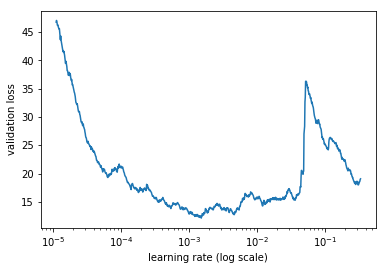

In [158]:
m.sched.plot()

In [159]:
lr=5e-5; wd=1e-6

In [160]:
%time m.fit(lr, 2, cycle_len=2, cycle_mult=2, metrics=[rmse])

epoch      trn_loss   val_loss   rmse                          
    0      14.781235  14.807194  3.748016  
    1      12.958119  14.762188  3.742506                      
    2      14.384175  14.414407  3.69296                       
    3      14.071619  14.339529  3.68361                       
    4      13.856909  14.229776  3.667675                      
    5      11.761227  14.234771  3.668712                      

CPU times: user 57 s, sys: 739 ms, total: 57.7 s
Wall time: 56.6 s


[array([14.23477]), 3.6687118778333327]

In [82]:
l = m.predict()

In [83]:
y.shape, l.shape

((201917,), (160917, 1))

In [190]:
gc.collect()

5095

In [81]:
import gc
gc.collect()

8457

In [92]:
rmse(l, y)

ValueError: operands could not be broadcast together with shapes (201917,) (123623,) 

In [125]:
df.shape, df_t.shape

((201917, 178), (123623, 178))

In [82]:
df.to_feather('dl_df_beta')
df_t.to_feather('dl_df_t_beta')

In [83]:
df_t = feather.read_dataframe('dl_df_t_beta')
df = feather.read_dataframe('dl_df_beta')

In [84]:
df.shape, df_t.shape

((201917, 178), (123623, 178))

In [85]:
df_test.shape

(123623, 179)

In [130]:
%time m.fit(lr, 2, wd, cycle_len=2, cycle_mult=2, metrics=[rmse])

epoch      trn_loss   val_loss   rmse                          
    0      14.791351  15.126971  3.80196   
    1      15.088356  15.08216   3.79615                       
    2      14.005444  14.609645  3.740064                      
    3      12.851993  14.550278  3.730572                      
    4      14.876751  14.39631   3.712769                      
    5      12.745191  14.421658  3.715282                      

CPU times: user 40.6 s, sys: 785 ms, total: 41.4 s
Wall time: 40.1 s


[array([14.42166]), 3.7152817555270703]

In [131]:
l = m.predict()
rmse(l, y)

3.934302457848325

In [121]:
%time m.fit(lr, 3, wd, metrics=[rmse])

epoch      trn_loss   val_loss   rmse                         
    0      12.313839  14.685268  3.626335  
    1      11.636162  14.866773  3.656945                     
    2      14.60143   15.627731  3.78566                      
CPU times: user 1min 51s, sys: 2.14 s, total: 1min 53s
Wall time: 1min 52s


[array([15.62773]), 3.7856603576887675]

In [135]:
%time m.fit(lr, 1, wd, cycle_len=2, cycle_mult=3, metrics=[rmse])

epoch      trn_loss   val_loss   rmse                       
    0      12.772112  14.705375  3.792834  
    1      11.019245  15.128058  3.844349                   
CPU times: user 25.1 s, sys: 543 ms, total: 25.7 s
Wall time: 24.8 s


[array([15.12806]), 3.8443493809803377]

In [85]:
from sklearn.model_selection import StratifiedKFold

In [86]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4590)
oof = np.zeros(len(df_raw))
predictions = np.zeros(len(df_test))

In [87]:
outliers = train_df3['outliers']

In [88]:
target = train_df3['target']

In [89]:
val_idx[:5]

[41000, 41001, 41002, 41003, 41004]

1. Get the val_idx
2. Get the model data set 
`ColumnarModelData.from_data_frame(PATH, val_idx, df, y, cat_flds=cat_flds, bs=64)`
3. Get the learner from model `md.get_learner(`
4. Fit the model `m.fit`

In [91]:
import gc
gc.collect()

0

In [152]:
%%time
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df, outliers.values)):
    print("fold {}".format(fold_))
    md = ColumnarModelData.from_data_frame(PATH, val_idx, df, target.astype(np.float32), 
                                           cat_flds=cat_flds, bs=128, test_df=df_t)
    m = md.get_learner(emb_szs, len(df.columns)-len(cat_flds),
                    0.04, 1, [1000, 500, 50, 10], [0.5, 0.5, 0.1, 0.1], y_range=y_range, use_bn=True)
    m.fit(lr, 2, wd, cycle_len=2, cycle_mult=2, metrics=[rmse])
    oof[val_idx] = m.predict().reshape(1, -1)[0]
    predictions += m.predict(is_test=True).reshape(1, -1)[0] / folds.n_splits

print(rmse(oof, target))

fold 0


epoch      trn_loss   val_loss   rmse                          
    0      15.04418   14.080989  3.655247  
    1      13.357478  13.860406  3.633134                      
    2      15.261212  13.722315  3.614915                      
    3      12.620456  13.537075  3.590767                      
    4      13.00645   13.456646  3.582054                      
    5      13.12599   13.428988  3.579914                      

fold 1


epoch      trn_loss   val_loss   rmse                          
    0      13.617827  13.965022  3.6414    
    1      13.079861  13.731323  3.614611                      
    2      11.972027  13.74923   3.614342                      
    3      14.52318   13.552962  3.598553                      
    4      12.174224  13.598773  3.600115                      
    5      12.668827  13.580135  3.600397                      

fold 2


epoch      trn_loss   val_loss   rmse                          
    0      14.155871  14.268029  3.673169  
    1      14.234623  14.129975  3.654891                      
    2      14.202703  13.75935   3.605025                      
    3      13.852974  13.683855  3.605496                      
    4      13.446477  13.576355  3.584531                      
    5      12.311568  13.582815  3.584924                      

fold 3


epoch      trn_loss   val_loss   rmse                          
    0      14.932624  13.909347  3.629735  
    1      14.032097  13.797103  3.615603                      
    2      13.875641  13.587077  3.590105                      
    3      13.241488  13.546938  3.582971                      
    4      12.881615  13.527927  3.581848                      
    5      13.862915  13.511095  3.582175                      

fold 4


epoch      trn_loss   val_loss   rmse                          
    0      14.480497  13.755276  3.603879  
    1      13.010159  13.693718  3.595021                      
    2      13.706165  13.587178  3.584129                      
    3      11.35896   13.613993  3.594746                      
    4      14.656499  13.512122  3.581542                      
    5      12.654803  13.513496  3.57855                       

3.6774048153824945
CPU times: user 5min 18s, sys: 4.85 s, total: 5min 23s
Wall time: 5min 16s


1. Round 1 - 3.6829778404491664
    - 178 cols 
    - [1000,500], [0.001,0.01]
    - 2, cycle_len=2, cycle_mult=1
    - 0.04
1. Round 2 - 3.6918684314349646
    - 178 cols 
    - [1000,500], [0.01,0.01]
    - 2, cycle_len=2, cycle_mult=2
        
1. Round 3 - 3.8706636257473663
    - 178 cols 
    - [1000,500], [0.001,0.01]
    - 3, cycle_len=2, cycle_mult=2
    
1. Round 4 - 3.6897606081657064
    - 178 cols 
    - [1000,500,100], [0.001,0.001, 0.01]
    - 2, cycle_len=2, cycle_mult=2

1. Round 5 - 3.7120662242321023
    - 178 cols 
    - [1000,500,1000], [0.001,0.001, 0.01]
    - 2, cycle_len=2, cycle_mult=2
    - 0.04
1. Round 5 - 3.7179195061868584
    - 178 cols 
    - [1000,500,1000], [0.001,0.001, 0.01]
    - 2, cycle_len=2, cycle_mult=2
    - 0.01
1. Round 6 - 3.7066968715711557
    - 178 cols 
    - [1000,500,1000], [0.001,0.001, 0.01]
    - 2, cycle_len=2, cycle_mult=2
    - 0.1 
1. Round 7 - 3.6924910735895273
    - 178 cols 
    - [1000,500], [0.001,0.01]
    - 2, cycle_len=2, cycle_mult=2
    - 0.1    
1. Round 8 - 3.8299337395345825
    - 178 cols 
    - [100, 1, 100, 10], [0.5, 0.0, 0.01, 0.0]
    - 2, cycle_len=2, cycle_mult=2
    - 0.01    
1. Round 8 - 3.6698599137831964
    - 178 cols 
    - [1000, 500], [0.5, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04   
1. Round 9 - 3.6847662491064166
    - 178 cols 
    - [1000, 500], [0.5, 0.1]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04   
1. Round 10 - 3.6810496643272974
    - 178 cols 
    - [1500, 500], [0.5, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04   
1. Round 11 - 3.6728591602118903
    - 178 cols 
    - [1000, 250], [0.5, 0.01], y_range=y_range)
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04
1. Round 11 - 3.6963961816811954
    - 178 cols 
    - 0.04, 1, [1000, 500], [0.5, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04
1. Round 12 - 3.7332198713513396
    - 178 cols 
    - 0.04, 1, [1000, 500, 250], [0.5, 0.1, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04
    - bs 64
1. Round 13 - 3.6926874253656465
    - 178 cols 
    - 0.04, 1, [1000, 500, 250], [0.5, 0.01, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04
    - bs 128
1. Round 14 - 3.725xxx
    - 178 cols 
    - 0.04, 1, [1000, 500, 250], [0.5, 0.01, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04
    - bs 128
    - use_bn = False
1. Round 15 - 3.682071482200128
    - 178 cols 
    - 0.04, 1, [1000, 500, 250], [0.5, 0.01, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04
    - bs 128
    - use_bn = True
1. Round 16 - 3.6829853042918717
    - 178 cols 
    - 0.04, 1, [1000, 500], [0.5, 0.01]
    - 2, wd, cycle_len=2, cycle_mult=2,
    - 0.04
    - bs 128
    - use_bn = True

In [94]:
oof.shape, predictions.shape

((201917,), (123623,))

In [95]:
np.save('oof_dl', oof)
np.save('predictions_dl', predictions)

In [112]:
1.9204810121779068**2

3.6882473181358773

In [115]:
predictions.shape, oof.shape, target.shape

((123623,), (201917,), (201917,))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>